In [2]:
import os
import cv2
import matplotlib.pyplot as plt


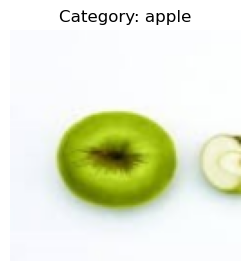

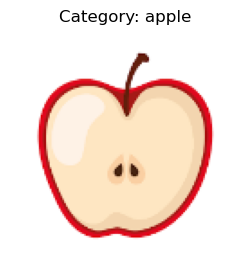

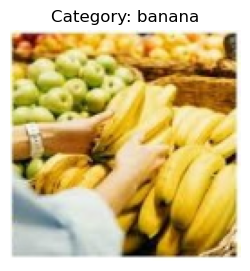

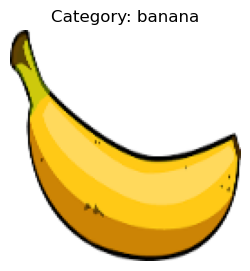

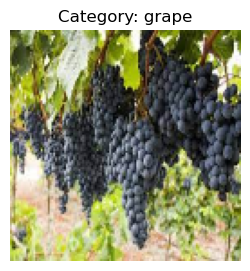

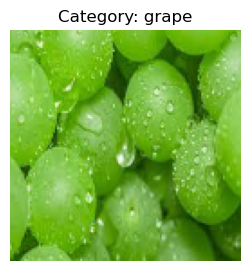

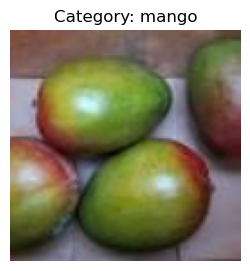

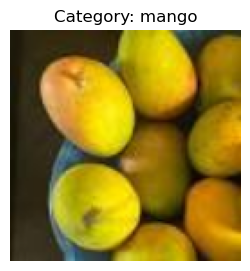

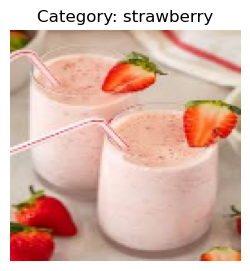

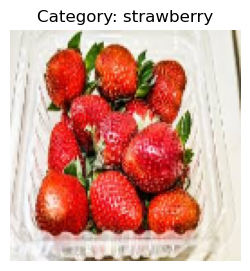

In [4]:

# Paths to datasets
base_dirs = {
    "train": "train",
    "test": "test",
    "valid": "valid"
}


# Categories
categories = ["apple", "banana", "grape", "mango", "strawberry"]

# Fixed size for resizing
IMG_SIZE = (128, 128)

# Function to load and preprocess 2 images per category
def load_sample_images(base_dir, num_samples=2):
    data = []
    for category in categories:
        folder_path = os.path.join(base_dir, category)
        count = 0
        for img_name in os.listdir(folder_path):
            if count >= num_samples:
                break
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image
                resized_img = cv2.resize(img, IMG_SIZE)
                data.append((resized_img, category))
                count += 1
    return data

# Load and preprocess 2 images per category from train
train_samples = load_sample_images(base_dirs["train"])

# Display sample images
for img, label in train_samples:
    plt.figure(figsize=(3, 3))
    plt.title(f"Category: {label}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:

# Function to load images
def load_images(base_dir, num_samples=2):
    data = []
    for category in categories:
        folder_path = os.path.join(base_dir, category)
        count = 0
        for img_name in os.listdir(folder_path):
            if count >= num_samples:
                break
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                data.append((img, category))  # Append raw image and category
                count += 1
    return data

# Function for preprocessing (resize and convert to grayscale)
def preprocess_images(images):
    processed_data = []
    for img, label in images:
        # Resize image
        resized_img = cv2.resize(img, IMG_SIZE)
        # Convert to grayscale
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # Optionally, apply some preprocessing like Gaussian blur to reduce noise
        processed_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
        processed_data.append((processed_img, label))
    return processed_data